
# Linear Interpolation and Numerical Differentiation



## 1. Linear Interpolation

Linear interpolation estimates unknown values between two known data points using the formula:

$$
y = y_0 + \frac{(x - x_0)(y_1 - y_0)}{x_1 - x_0}
$$


### Exercise- 
Find the linear interpolation value at x = 2.5 between the two unkown data points (1, 3) & (4, 12). Print your results.

In [4]:
# Yor code here to complete the Linear Interpolation Function
x = 2.5
x0 = 1.
x1 = 4.
y0 = 4.
y1 = 12.
y = y0+(((x-x0)*(y1-y0)) / (x1-x0))
print(y)

8.0



## 2. Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points.

- Forward Difference:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- Backward Difference:
$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

- Central Difference:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$


### Exercise- 
Find the derivative of f = sin (x) at x = pi/4 using foward difference, backward difference, and central difference. You decide the step size.

In [ ]:

import math
x = math.pi/4
# Your code here
def f(x):
    return math.sin(x)

oh = 0.000000001


front_dif = ((f(x + oh) - f(x)) / oh)
back_dif = ((f(x ) - f(x - oh)) / oh)
c_dif = ((f(x + oh) - f(x - oh)) / 2*oh)

print(front_dif)
print(back_dif)
print(c_dif)

0.7071067065211878
0.7071068175434903
7.071067620323391e-19



## 3. Numerical Differentiation Using Taylor Series

Implement numerical differentiation formulas for higher-order derivatives using Taylor series expansions. 


### Exercise- 
Usign Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi). 

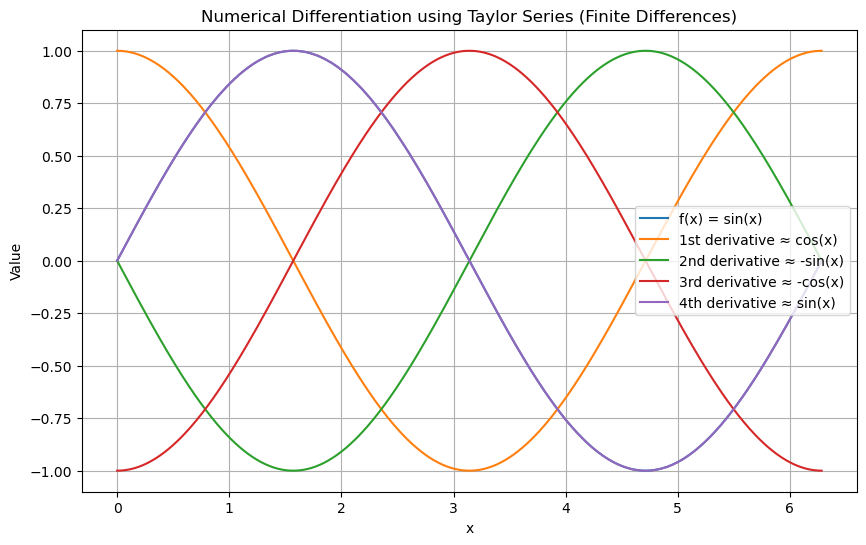

In [1]:
# Your code here

import numpy as np
import matplotlib.pyplot as plt

# Define function and step size
def f(x):
    return np.sin(x)

h = 0.001  # small step size for numerical differentiation

# First derivative using forward difference
def f1(x):
    return (f(x + h) - f(x - h)) / (2 * h)

# Second derivative using central difference
def f2(x):
    return (f(x + h) - 2*f(x) + f(x - h)) / (h**2)

# Third derivative (using finite difference of second derivative)
def f3(x):
    return (f(x + 2*h) - 2*f(x + h) + 2*f(x - h) - f(x - 2*h)) / (2 * h**3)

# Fourth derivative
def f4(x):
    return (f(x + 2*h) - 4*f(x + h) + 6*f(x) - 4*f(x - h) + f(x - 2*h)) / (h**4)

# Generate x values and compute derivatives
x = np.linspace(0, 2*np.pi, 500)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)
y4 = f4(x)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(x, f(x), label='f(x) = sin(x)')
plt.plot(x, y1, label="1st derivative ≈ cos(x)")
plt.plot(x, y2, label="2nd derivative ≈ -sin(x)")
plt.plot(x, y3, label="3rd derivative ≈ -cos(x)")
plt.plot(x, y4, label="4th derivative ≈ sin(x)")
plt.legend()
plt.title("Numerical Differentiation using Taylor Series (Finite Differences)")
plt.xlabel("x")
plt.ylabel("Value")
plt.grid(True)
plt.show()


### Engineering Problem: Beam Deflection Analysis

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$


#### 🎯 Task:
Given deflection data y(x) along a beam, estimate the bending moment M(x) and shear force V(x) using numerical differentiation and plot them. 

Equations:
$$ M(x) = -EI \frac{d^2 y}{dx^2}$$
$$ V(x) = \frac{dM}{dx} $$

#### 📌 Constants:
- L = 10 
- w = 5 
- E = 200e9
- I = 1e-6

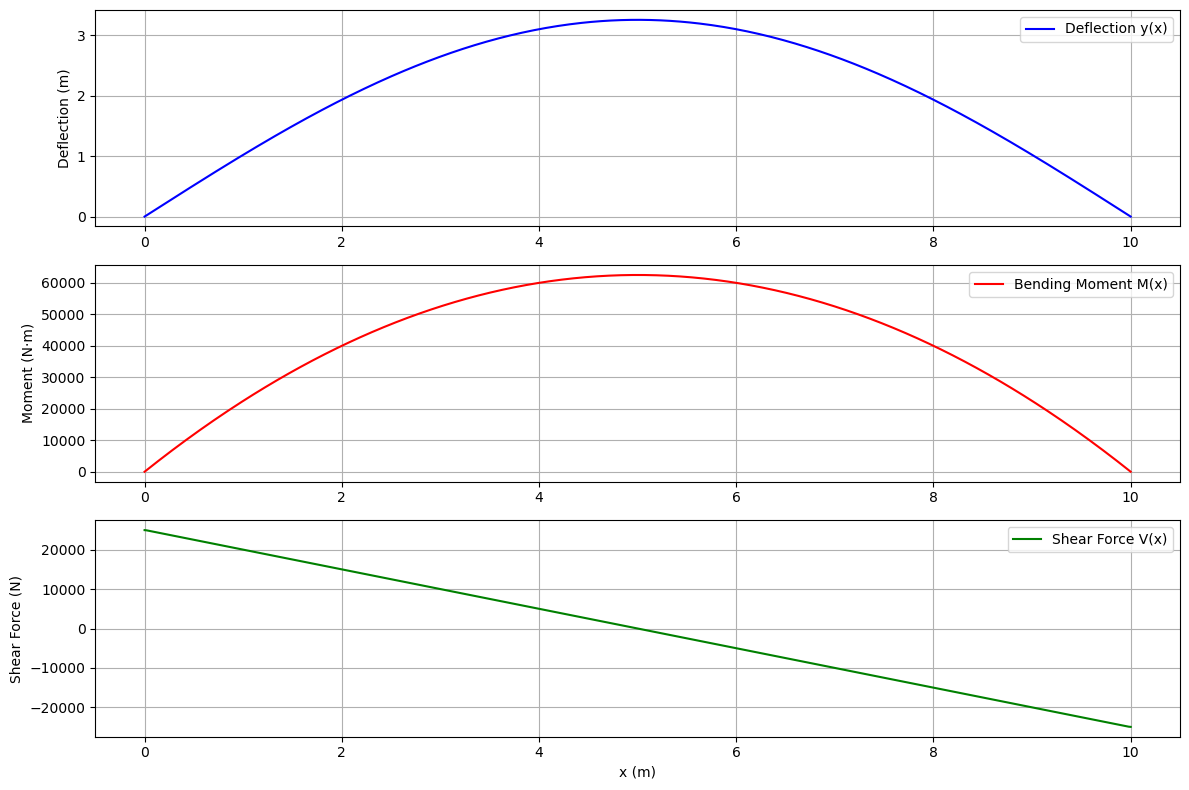

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
w = 5e3      # Load intensity (N/m) — converted from 5 kN/m
L = 10       # Length of beam (m)
E = 200e9    # Young's modulus (Pa)
I = 1e-6     # Moment of inertia (m^4)

# Step size
h = 0.01

# Define deflection function y(x)
def y(x):
    return (w / (24 * E * I)) * x * (L**3 - 2*L*x**2 + x**3)

# Numerical derivatives
def d2y_dx2(x):
    return (y(x + h) - 2*y(x) + y(x - h)) / h**2

def dM_dx(x):
    return (M(x + h) - M(x - h)) / (2 * h)

# Define x values
x = np.linspace(0, L, 500)

# Compute M(x) and V(x)
M = -E * I * d2y_dx2(x)
V = np.gradient(M, x)  # numerical derivative of M

# Plot results
plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot(x, y(x), label='Deflection y(x)', color='blue')
plt.ylabel('Deflection (m)')
plt.grid(True)
plt.legend()

plt.subplot(3,1,2)
plt.plot(x, M, label='Bending Moment M(x)', color='red')
plt.ylabel('Moment (N·m)')
plt.grid(True)
plt.legend()

plt.subplot(3,1,3)
plt.plot(x, V, label='Shear Force V(x)', color='green')
plt.xlabel('x (m)')
plt.ylabel('Shear Force (N)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()




## 4. Ordinary Differential Equations - Initial Value Problems

This notebook introduces Ordinary Differential Equations (ODEs) with a focus on Initial Value Problems (IVPs). We will explore numerical methods such as Euler's Method and Runge-Kutta Methods with examples and visualizations.



### What is an ODE?

An Ordinary Differential Equation (ODE) is an equation involving a function and its derivatives.

### Initial Value Problem (IVP)
An IVP is an ODE along with a specified value at a starting point:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$



#### (a) Euler's Method

Algorithm:
1. Choose step size \( h \)
2. Iterate: \( y_{n+1} = y_n + h f(x_n, y_n) \)
3. Repeat for desired number of steps


#### Exercise
Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

x = 0.0, y (Euler) = 1.00000, y (Exact) = 1.00000
x = 0.1, y (Euler) = 1.10000, y (Exact) = 1.10517
x = 0.2, y (Euler) = 1.21052, y (Exact) = 1.22140
x = 0.3, y (Euler) = 1.33266, y (Exact) = 1.34986
x = 0.4, y (Euler) = 1.46764, y (Exact) = 1.49182
x = 0.5, y (Euler) = 1.61683, y (Exact) = 1.64872
x = 0.6, y (Euler) = 1.78170, y (Exact) = 1.82212
x = 0.7, y (Euler) = 1.96391, y (Exact) = 2.01375
x = 0.8, y (Euler) = 2.16528, y (Exact) = 2.22554
x = 0.9, y (Euler) = 2.38784, y (Exact) = 2.45960
x = 1.0, y (Euler) = 2.63380, y (Exact) = 2.71828


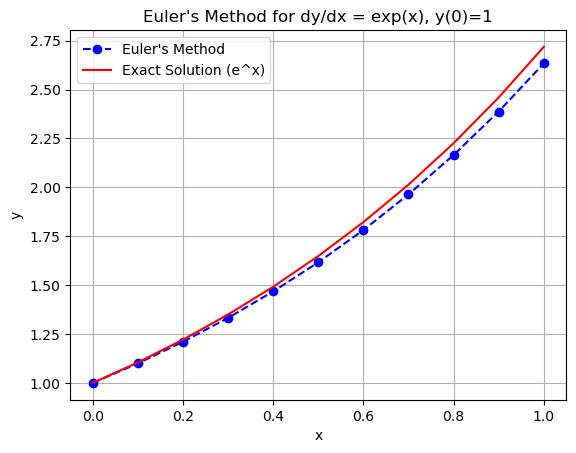

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Define the derivative dy/dx = f(x, y)
def f(x, y):
    return math.exp(x)

# Initial condition
x0 = 0
y0 = 1

# Step size and range
h = 0.1
x_max = 1.0

# Create arrays for x and y
n_steps = int((x_max - x0) / h)
x = np.zeros(n_steps + 1)
y = np.zeros(n_steps + 1)

# Set initial values
x[0] = x0
y[0] = y0

# Euler's Method iteration
for i in range(n_steps):
    y[i+1] = y[i] + h * f(x[i], y[i])
    x[i+1] = x[i] + h

# Exact solution for comparison: y = e^x
y_exact = np.exp(x)

# Print results
for i in range(len(x)):
    print(f"x = {x[i]:.1f}, y (Euler) = {y[i]:.5f}, y (Exact) = {y_exact[i]:.5f}")

# Plot numerical vs exact
plt.plot(x, y, 'bo--', label="Euler's Method")
plt.plot(x, y_exact, 'r-', label="Exact Solution (e^x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Euler's Method for dy/dx = exp(x), y(0)=1")
plt.grid(True)
plt.show()



#### (b) Runge-Kutta Method (RK4)

Algorithm:
1. Compute intermediate slopes:
   - \( k_1 = h f(x_n, y_n) \)
   - \( k_2 = h f(x_n + h/2, y_n + k_1/2) \)
   - \( k_3 = h f(x_n + h/2, y_n + k_2/2) \)
   - \( k_4 = h f(x_n + h, y_n + k_3) \)
2. Update: \( y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6 \)


#### Exercise
Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

x = 0.0, y (RK4) = 1.000000, y (Exact) = 1.000000
x = 0.1, y (RK4) = 1.105171, y (Exact) = 1.105171
x = 0.2, y (RK4) = 1.221403, y (Exact) = 1.221403
x = 0.3, y (RK4) = 1.349859, y (Exact) = 1.349859
x = 0.4, y (RK4) = 1.491825, y (Exact) = 1.491825
x = 0.5, y (RK4) = 1.648721, y (Exact) = 1.648721
x = 0.6, y (RK4) = 1.822119, y (Exact) = 1.822119
x = 0.7, y (RK4) = 2.013753, y (Exact) = 2.013753
x = 0.8, y (RK4) = 2.225541, y (Exact) = 2.225541
x = 0.9, y (RK4) = 2.459603, y (Exact) = 2.459603
x = 1.0, y (RK4) = 2.718282, y (Exact) = 2.718282


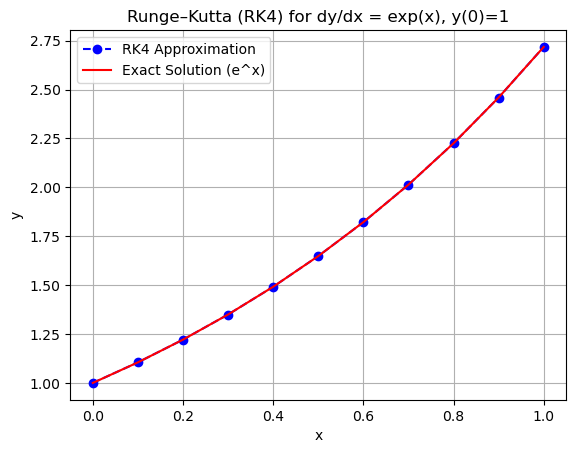

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Define dy/dx = f(x, y)
def f(x, y):
    return math.exp(x)

# Initial conditions
xn = 0
yn = 1
h = 0.1
steps = 10  # number of steps

# Store results
x = [xn]
y = [yn]

# Runge-Kutta 4th Order Method
for n in range(steps):
    k1 = h * f(xn, yn)
    k2 = h * f(xn + h/2, yn + k1/2)
    k3 = h * f(xn + h/2, yn + k2/2)
    k4 = h * f(xn + h, yn + k3)
    
    yn = yn + (k1 + 2*k2 + 2*k3 + k4) / 6
    xn = xn + h
    
    x.append(xn)
    y.append(yn)

# Exact solution
y_exact = np.exp(x)

# Print comparison
for i in range(len(x)):
    print(f"x = {x[i]:.1f}, y (RK4) = {y[i]:.6f}, y (Exact) = {y_exact[i]:.6f}")

# Plot results
plt.plot(x, y, 'bo--', label="RK4 Approximation")
plt.plot(x, y_exact, 'r-', label="Exact Solution (e^x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Runge–Kutta (RK4) for dy/dx = exp(x), y(0)=1")
plt.grid(True)
plt.show()
